# Auto Feature engineering for AWS product review

## 1. Load Datasets

In [1]:
import pandas as pd
import os, sys
from pathlib import Path
pathlib = str(Path(os.path.abspath('')).parent.parent.parent.parent.resolve())
dir_path = f"{pathlib}/tests/data/"
train_data = pd.read_table(f"{dir_path}/amazon_reviews_us_Books.tsv",on_bad_lines='skip')
train_data

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,25933450,RJOVP071AVAJO,0439873800,84656342,There Was an Old Lady Who Swallowed a Shell!,Books,5,0.0,0.0,N,Y,Five Stars,I love it and so does my students!,2015-08-31
1,US,1801372,R1ORGBETCDW3AI,1623953553,729938122,I Saw a Friend,Books,5,0.0,0.0,N,Y,"Please buy ""I Saw a Friend""! Your children wil...",My wife and I ordered 2 books and gave them as...,2015-08-31
2,US,5782091,R7TNRFQAOUTX5,142151981X,678139048,"Black Lagoon, Vol. 6",Books,5,0.0,0.0,N,Y,Shipped fast.,Great book just like all the others in the ser...,2015-08-31
3,US,32715830,R2GANXKDIFZ6OI,014241543X,712432151,If I Stay,Books,5,0.0,0.0,N,N,Five Stars,So beautiful,2015-08-31
4,US,14005703,R2NYB6C3R8LVN6,1604600527,800572372,Stars 'N Strips Forever,Books,5,2.0,2.0,N,Y,Five Stars,Enjoyed the author's story and his quilts are ...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9662,US,14683075,RIJIC2WYNOIME,1592287778,178610800,Training Your Foal,Books,3,0.0,0.0,N,Y,"It gives some decent tips, but I don't think ...","It gives some decent tips, but I don't think I...",2015-08-31
9663,US,20103035,RQMFNQ8UJ3M2O,1586400339,981906384,"Life Essentials Study Bible, Hardcover Indexed...",Books,5,0.0,0.0,N,Y,Surely God inspired,An incredible research reference! The depth an...,2015-08-31
9664,US,46400209,R2LLL362D2063C,0375756671,910147112,Standing at the Scratch Line: A Novel (Striver...,Books,5,0.0,0.0,N,Y,Thumbs up,Great book. It arrived promptly just as promised.,2015-08-31
9665,US,4748619,R1G9EEWX3PZYHU,151181585X,87670264,Learning to Love Kimchi: Letters Home from a P...,Books,5,0.0,0.0,N,N,a great read on so many levels it's an wonderf...,a great read on so many levels it's an wonderf...,2015-08-31


## 2. Data Profile for pipeline

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


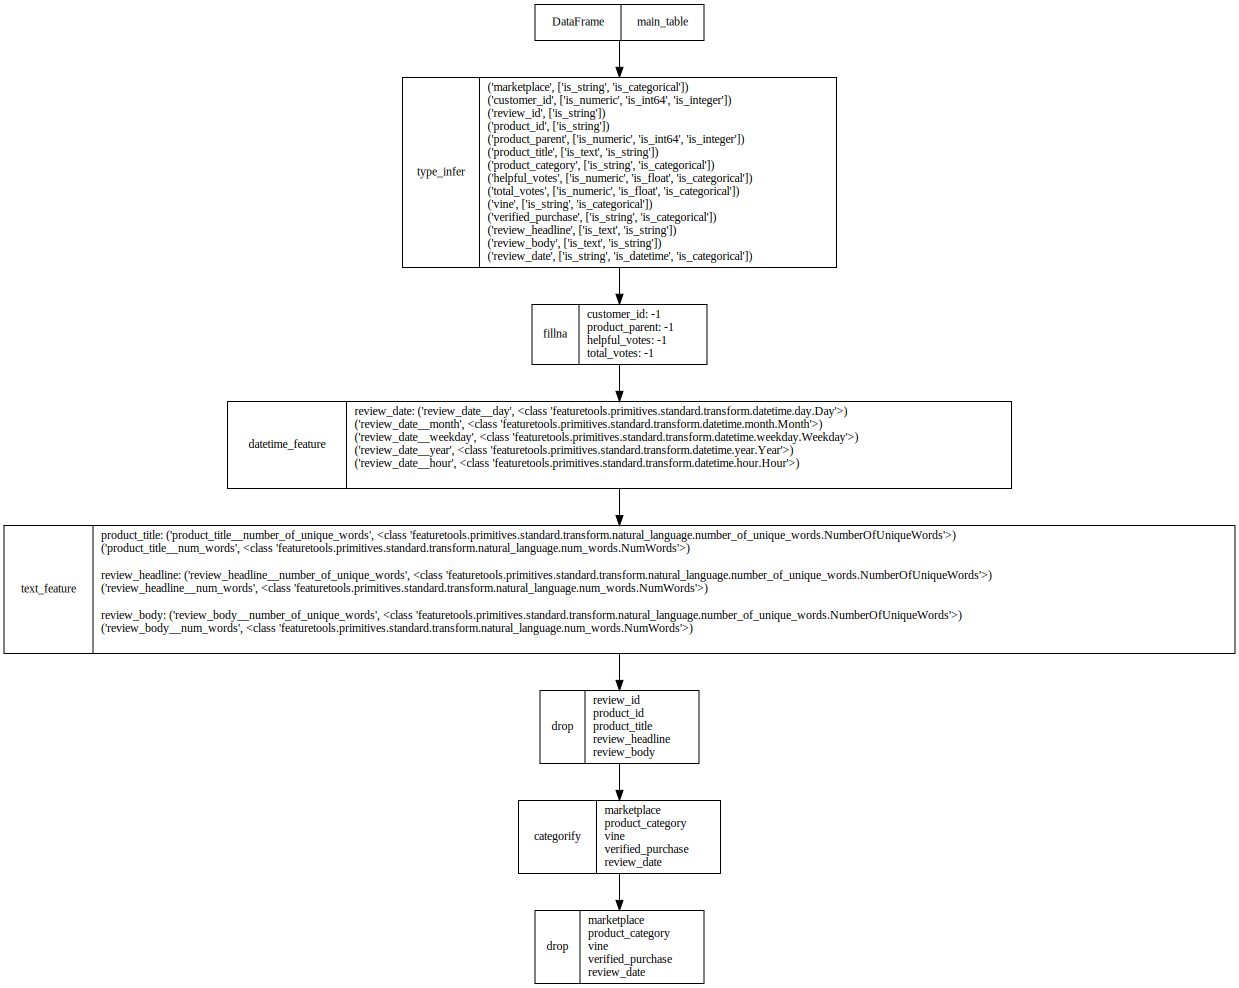

In [2]:
from pyrecdp.autofe import FeatureWrangler

pipeline = FeatureWrangler(dataset=train_data, label="star_rating")
pipeline.plot()

In [4]:
pipeline.fit_transform()

execute with pandas started ...
execute DataFrame started ...
  execute DataFrame took 9.591225534677505e-06 sec
execute type_infer started ...
  execute type_infer took 0.008400043938308954 sec
execute fillna started ...
  execute fillna took 0.003615500871092081 sec
execute datetime_feature started ...
  execute datetime_feature took 0.010622884146869183 sec
execute text_feature started ...
  execute text_feature took 0.5507431449368596 sec
execute drop started ...
  execute drop took 0.0017910669557750225 sec
execute categorify started ...
  execute categorify took 0.0035031172446906567 sec
execute drop started ...
  execute drop took 0.001267929095774889 sec
execute with pandas took 0.5803032438270748 sec


,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_date__day,review_date__month,review_date__weekday,review_date__year,review_date__hour,...,product_title__num_words,review_headline__number_of_unique_words,review_headline__num_words,review_body__number_of_unique_words,review_body__num_words,marketplace__idx,product_category__idx,vine__idx,verified_purchase__idx,review_date__idx
0,25933450,84656342,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,9,2,2,8,8,0,0,0,0,0
1,1801372,729938122,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,4,11,11,50,62,0,0,0,0,0
2,5782091,678139048,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,4,2,2,9,10,0,0,0,0,0
3,32715830,712432151,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,3,2,2,2,2,0,0,0,1,0
4,14005703,800572372,5,2.0,2.0,31.0,8.0,0.0,2015.0,0.0,...,4,2,2,15,15,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9662,14683075,178610800,3,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,3,9,9,27,32,0,0,0,0,0
9663,20103035,981906384,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,11,3,3,16,17,0,0,0,0,0
9664,46400209,910147112,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,9,2,2,8,8,0,0,0,0,0
9665,4748619,87670264,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,11,11,11,62,75,0,0,0,1,0


In [5]:
pipeline.export()

{
    "0": {
        "children": null,
        "op": "DataFrame",
        "config": "'main_table'"
    },
    "1": {
        "children": [
            0
        ],
        "op": "type_infer",
        "config": [
            "('marketplace', ['is_string', 'is_categorical'])",
            "('customer_id', ['is_numeric', 'is_int64', 'is_integer'])",
            "('review_id', ['is_string'])",
            "('product_id', ['is_string'])",
            "('product_parent', ['is_numeric', 'is_int64', 'is_integer'])",
            "('product_title', ['is_text', 'is_string'])",
            "('product_category', ['is_string', 'is_categorical'])",
            "('helpful_votes', ['is_numeric', 'is_float', 'is_categorical'])",
            "('total_votes', ['is_numeric', 'is_float', 'is_categorical'])",
            "('vine', ['is_string', 'is_categorical'])",
            "('verified_purchase', ['is_string', 'is_categorical'])",
            "('review_headline', ['is_text', 'is_string'])",
            "(

## optional - process with spark

In [3]:
pipeline.fit_transform('spark')

Will assign 48 cores and 308513 M memory for spark
23/03/06 08:54:47 WARN Utils: Your hostname, sr419 resolves to a loopback address: 127.0.1.1; using 10.0.2.19 instead (on interface ens818f1)
23/03/06 08:54:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/06 08:54:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
per core memory size is 6.277 GB and shuffle_disk maximum capacity is 8589934592.000 GB
append DataFrame
append type_infer
append DataFrameToRDDConverter
DataframeConvert partition pandas dataframe to spark RDD took 0.383 secs
append fillna
append datetime_feature
append text_feature
append drop
append categorify
append drop
append RDDToDataFrameConverter
execute with spark started ...


DataframeTransform took 6.125 secs, processed 9667 rows with num_partitions as 198
DataframeTransform combine to one pandas dataframe took 0.035 secs
execute with spark took 6.161225375253707 sec


,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_date__day,review_date__month,review_date__weekday,review_date__year,review_date__hour,...,product_title__num_words,review_headline__number_of_unique_words,review_headline__num_words,review_body__number_of_unique_words,review_body__num_words,marketplace__idx,product_category__idx,vine__idx,verified_purchase__idx,review_date__idx
0,25933450,84656342,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,9,2,2,8,8,0,0,0,0,0
1,1801372,729938122,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,4,11,11,50,62,0,0,0,0,0
2,5782091,678139048,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,4,2,2,9,10,0,0,0,0,0
3,32715830,712432151,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,3,2,2,2,2,0,0,0,1,0
4,14005703,800572372,5,2.0,2.0,31.0,8.0,0.0,2015.0,0.0,...,4,2,2,15,15,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9662,14683075,178610800,3,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,3,9,9,27,32,0,0,0,0,0
9663,20103035,981906384,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,11,3,3,16,17,0,0,0,0,0
9664,46400209,910147112,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,9,2,2,8,8,0,0,0,0,0
9665,4748619,87670264,5,0.0,0.0,31.0,8.0,0.0,2015.0,0.0,...,11,11,11,62,75,0,0,0,1,0
